In [1]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch


In [1]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
label_path = './input/labels.csv'
image_path = './input/head_ct/head_ct'

label_df = pd.read_csv(label_path)
image_files = sorted(glob.glob(image_path + '/*.png'))

In [3]:
label_path = './input/labels.csv'
label_df = pd.read_csv(label_path)
label_df

,id,hemorrhage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [4]:
image_files

['./input/head_ct/head_ct/000.png',
 './input/head_ct/head_ct/001.png',
 './input/head_ct/head_ct/002.png',
 './input/head_ct/head_ct/003.png',
 './input/head_ct/head_ct/004.png',
 './input/head_ct/head_ct/005.png',
 './input/head_ct/head_ct/006.png',
 './input/head_ct/head_ct/007.png',
 './input/head_ct/head_ct/008.png',
 './input/head_ct/head_ct/009.png',
 './input/head_ct/head_ct/010.png',
 './input/head_ct/head_ct/011.png',
 './input/head_ct/head_ct/012.png',
 './input/head_ct/head_ct/013.png',
 './input/head_ct/head_ct/014.png',
 './input/head_ct/head_ct/015.png',
 './input/head_ct/head_ct/016.png',
 './input/head_ct/head_ct/017.png',
 './input/head_ct/head_ct/018.png',
 './input/head_ct/head_ct/019.png',
 './input/head_ct/head_ct/020.png',
 './input/head_ct/head_ct/021.png',
 './input/head_ct/head_ct/022.png',
 './input/head_ct/head_ct/023.png',
 './input/head_ct/head_ct/024.png',
 './input/head_ct/head_ct/025.png',
 './input/head_ct/head_ct/026.png',
 './input/head_ct/head_ct/02

In [4]:
labels = np.array(label_df[' hemorrhage'].tolist())

In [5]:
images = np.array([cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in image_files])

/home/ubuntu/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [7]:
images.shape

(200,)

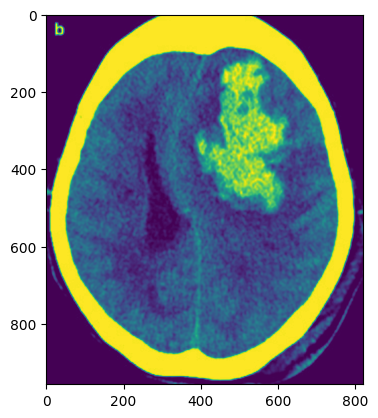

In [8]:
plt.imshow(images[0])


阈值： 124.0


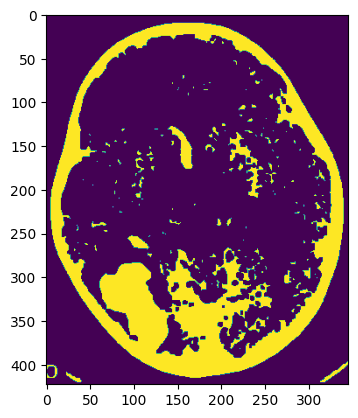

In [113]:
img = cv2.imread(image_files[32])  # 读取的图片路径
# 转换为灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 将灰度极差的一半作为阈值
difference = (img_gray.max() - img_gray.min()) // 2
# 将图像二值化
_, img_binary = cv2.threshold(img_gray, difference, 1, cv2.THRESH_BINARY)
imgn = cv2.erode(img_binary, np.ones((3, 3), np.uint8), iterations=1)
print("阈值：", _)
plt.imshow(imgn)

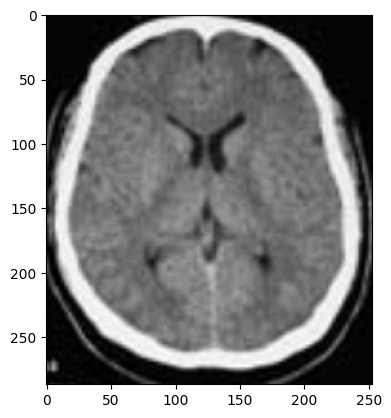

In [32]:
plt.imshow(cv2.imread(image_files[119]))

In [7]:
def splitTestTrain(X, Y):
    trainSize = (int)(0.8 * X.shape[0])
    Y = np.reshape(Y, (Y.shape[0], 1))
    indexes = np.arange(200)
    indexes = np.reshape(indexes, (200, 1))
    # to concatenate the data features with the labels
    # labels now is data[:, -1]
    data = np.concatenate((X, Y, indexes), axis=1)
    np.random.shuffle(data)
    trainX = data[: trainSize, :-2]
    trainY = data[: trainSize, -2]
    testX = data[trainSize:, :-2]
    testY = data[trainSize:, -2]
    imagesTest = data[trainSize:, -1]
    return trainX, trainY, testX, testY, imagesTest

In [8]:
def image_to_vector(image, size):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, dsize=size, interpolation=cv2.INTER_CUBIC).flatten()

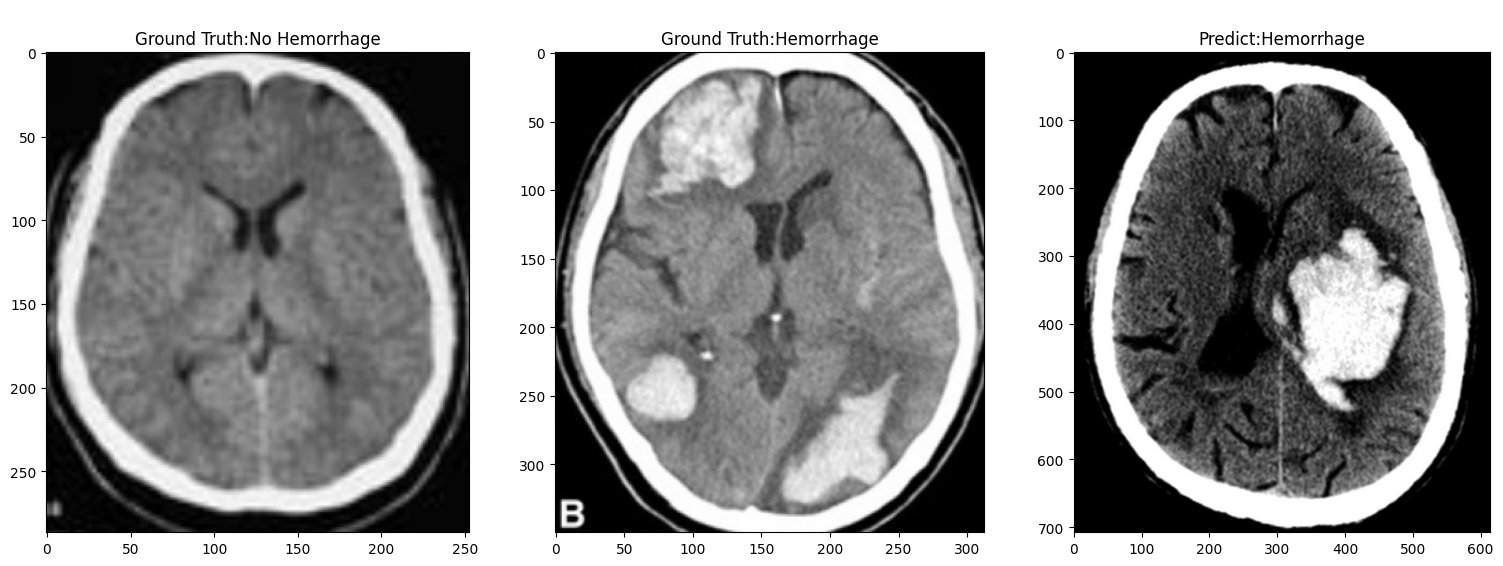

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(cv2.imread(image_files[119]))
plt.title("\nGround Truth:{}".format("No Hemorrhage"))
plt.subplot(1, 3, 2)
plt.imshow(cv2.imread(image_files[42]))
plt.title("\nGround Truth:{}".format("Hemorrhage"))
plt.subplot(1, 3, 3)
plt.imshow(cv2.imread(image_files[3]))
plt.title("\nPredict:{}".format("Hemorrhage"))
plt.subplots_adjust(left=0, bottom=0, right=2.4, top=1, wspace=0, hspace=0)
plt.savefig('target.png')

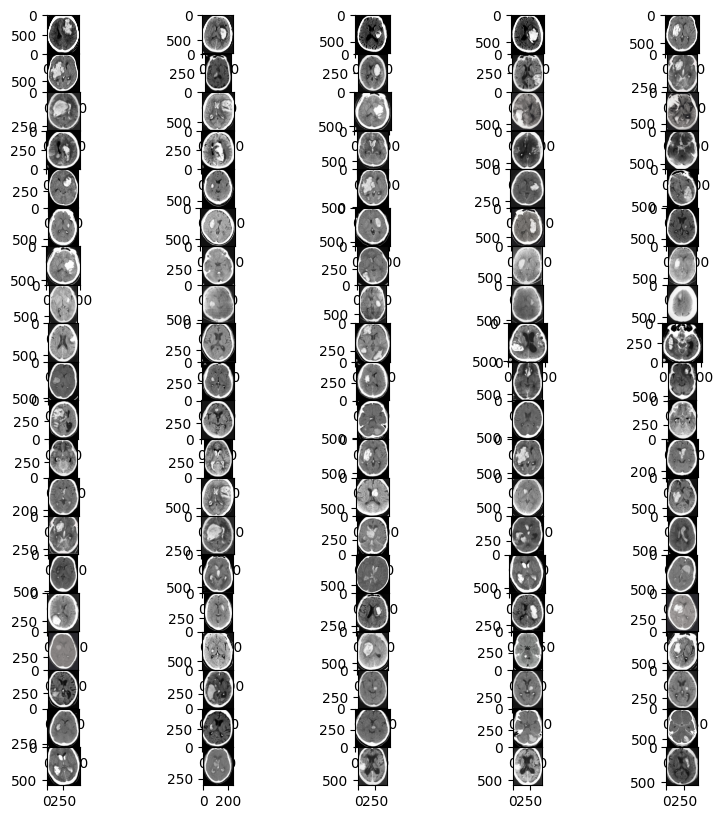

In [26]:
plt.figure(figsize=(10, 10))
for i in range(0, 100):
    plt.subplot(20, 5, i + 1)
    plt.imshow(cv2.imread(image_files[i]))
plt.subplots_adjust(wspace=-0.01, hspace=0.01)

In [10]:
size = (128, 128)
succinct_x = []
flatten_size = size[0] * size[1]
succinct_x = np.empty(shape=(0, flatten_size))
for image in images:
    succinct_x = np.vstack([image_to_vector(image, size), succinct_x])

X = succinct_x

# 3) Split data into train & test sets, including shuffle of the data
trainX, trainY, testX, testY, testIm = splitTestTrain(X, labels)

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import wasserstein_distance
import random

In [ ]:
def drawPredict(model, testX, testY, images, index):
    modelName = str(model)
    modelName = modelName.split("(")[0]
    rand = random.randint(0, 39)
    inde = int(index[rand])
    plt.imshow(images[inde], cmap='gray')
    if testY[rand] == 1:
        plt.title("\nLabel:{}".format("Hemorrhage"))
    else:
        plt.title("\nLabel:{}".format("No Hemorrhage"))
    plt.show()
    predict = "Hemorrhage" if model.predict([testX[rand]]) == 1 else "No Hemorrhage"
    label = "Hemorrhage" if testY[rand] == 1 else "No Hemorrhage"
    print("The model", modelName, " predict:", predict, "the correct label:", label)

In [ ]:
def knn(trainX, trainY, testX, testY, images, index, numNeigh=3):
    # n_jobs means number of parallel jobs to run. -1 meansusing all processors
    model = KNeighborsClassifier(n_neighbors=numNeigh, n_jobs=-1)
    model.fit(trainX, trainY)
    acc = model.score(testX, testY) * 100
    drawPredict(model, testX, testY, images, index)
    return acc

In [ ]:
results = np.zeros(9)
nb_iteration = 10

for epoch in range(nb_iteration):
    results[1] += knn(trainX, trainY, testX, testY, images, testIm, numNeigh=2)

results = np.divide(results, nb_iteration)
print('knn: {:.2f}%'.format(results[1]))

In [7]:
from lxml import etree

In [8]:
def parse_anno(file, img):
    root = etree.parse(file).getroot()
    image_name_attr = ".//image[@name='{}']".format(img)
    for image_tag in root.iterfind(image_name_attr):
        path = []
        for poly in image_tag.iter('polygon'):
            points = [tuple(map(float, p.split(','))) for p in poly.attrib["points"].split(';')]
            points = np.array([(int(p[0]), int(p[1])) for p in points]).astype(int)
            path.append(points)
        return path


parse_anno('./input/anno.xml', "042.png")

[array([[ 72, 221],
        [ 67, 232],
        [ 54, 241],
        [ 51, 250],
        [ 52, 254],
        [ 57, 260],
        [ 72, 268],
        [ 92, 268],
        [101, 260],
        [102, 239],
        [ 90, 223],
        [ 81, 220]]),
 array([[148,  17],
        [128,  15],
        [121,  19],
        [113,  19],
        [ 95,  27],
        [ 81,  41],
        [ 77,  53],
        [ 77,  78],
        [ 82,  87],
        [ 77,  91],
        [ 77,  97],
        [ 74,  99],
        [ 74, 103],
        [ 91, 102],
        [ 96, 100],
        [ 98,  95],
        [110,  91],
        [118,  92],
        [124,  97],
        [130,  98],
        [143,  89],
        [145,  83],
        [144,  62],
        [147,  55],
        [147,  35],
        [149,  30]]),
 array([[249, 235],
        [243, 237],
        [235, 246],
        [228, 250],
        [208, 252],
        [208, 262],
        [198, 268],
        [195, 275],
        [185, 284],
        [178, 295],
        [171, 296],
        [165, 31

In [9]:
def gen_mask(img, path):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    for p in path:
        cv2.fillPoly(mask, [p], 255)
    return mask

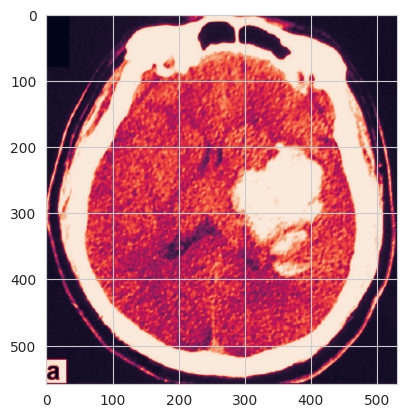

In [10]:
plt.imshow(gen_mask(images[12], parse_anno('./input/anno.xml', "012.png")))
plt.imshow(images[12])


In [15]:
import matplotlib

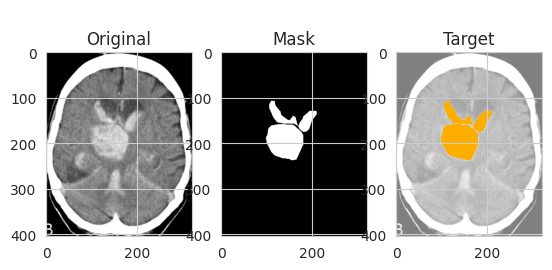

In [18]:
id = "067"

transparent_cmap = matplotlib.colors.ListedColormap(['none', '#ffae00'])

plt.subplot(1, 3, 1)
plt.imshow(images[int(id)],cmap='gray')
plt.title("\nOriginal")
plt.subplot(1, 3, 2)
plt.imshow(gen_mask(images[int(id)], parse_anno('./input/anno.xml', id + ".png")),cmap='gray')
plt.title("\nMask")
# 图像融合显示
plt.subplot(1, 3, 3)
plt.imshow(images[int(id)], alpha=0.5,cmap='gray')
plt.imshow(gen_mask(images[int(id)], parse_anno('./input/anno.xml', id + ".png")),cmap=transparent_cmap)
plt.title("\nTarget")
plt.show()

In [86]:
images[0].shape

(957, 821)

In [112]:
for file in image_files:
    cv2.imwrite("./input/mask/" + file[-7:], gen_mask(cv2.imread(file), parse_anno('./input/anno.xml', file[-7:])))
    print(file[-7:])

000.png
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
010.png
011.png
012.png
013.png
014.png
015.png
016.png
017.png
018.png
019.png
020.png
021.png
022.png
023.png
024.png
025.png
026.png
027.png
028.png
029.png
030.png
031.png
032.png
033.png
034.png
035.png
036.png
037.png
038.png
039.png
040.png
041.png
042.png
043.png
044.png
045.png
046.png
047.png
048.png
049.png
050.png
051.png
052.png
053.png
054.png
055.png
056.png
057.png
058.png
059.png
060.png
061.png
062.png
063.png
064.png
065.png
066.png
067.png
068.png
069.png
070.png
071.png
072.png
073.png
074.png
075.png
076.png
077.png
078.png
079.png
080.png
081.png
082.png
083.png
084.png
085.png
086.png
087.png
088.png
089.png
090.png
091.png
092.png
093.png
094.png
095.png
096.png
097.png
098.png
099.png
100.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
120.png
121.png
122.png
123.png
124.png


In [91]:
parse_anno('./input/anno.xml', "12.png")

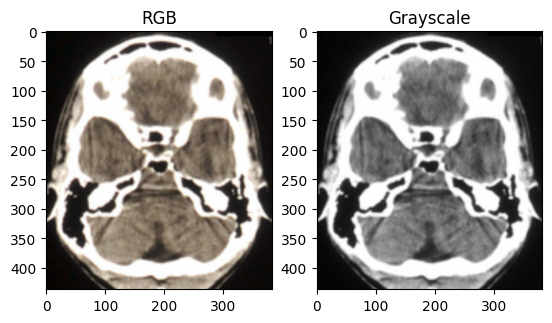

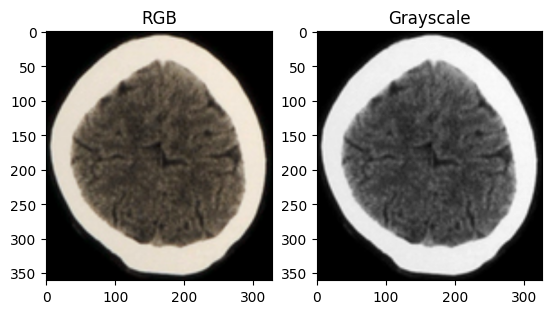

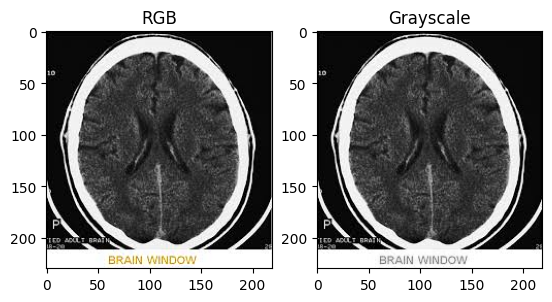

In [30]:
arr = [162, 175, 197]
for i in arr:
    file = image_files[i]
    plt.subplot(4, 2, 1)
    plt.imshow(cv2.imread(file))
    plt.title("RGB")
    plt.subplot(4, 2, 2)
    plt.imshow(cv2.imread(file, cv2.IMREAD_GRAYSCALE), cmap='gray')
    plt.title("Grayscale")
    plt.show()

In [31]:
import numpy as np
import cv2


def getVarianceMean(scr, winSize):
    if scr is None or winSize is None:
        print("The input parameters of getVarianceMean Function error")
        return -1

    if winSize % 2 == 0:
        print("The window size should be singular")
        return -1

    copyBorder_map = cv2.copyMakeBorder(scr, winSize // 2, winSize // 2, winSize // 2, winSize // 2,
                                        cv2.BORDER_REPLICATE)
    shape = np.shape(scr)

    local_mean = np.zeros_like(scr)
    local_std = np.zeros_like(scr)

    for i in range(shape[0]):
        for j in range(shape[1]):
            temp = copyBorder_map[i:i + winSize, j:j + winSize]
            local_mean[i, j], local_std[i, j] = cv2.meanStdDev(temp)
            if local_std[i, j] <= 0:
                local_std[i, j] = 1e-8

    return local_mean, local_std


def adaptContrastEnhancement(scr, winSize, maxCg):
    if scr is None or winSize is None or maxCg is None:
        print("The input parameters of ACE Function error")
        return -1

    YUV_img = cv2.cvtColor(scr, cv2.COLOR_BGR2YUV)  ##转换通道
    Y_Channel = YUV_img[:, :, 0]
    shape = np.shape(Y_Channel)

    meansGlobal = cv2.mean(Y_Channel)[0]

    ##这里提供使用boxfilter 计算局部均质和方差的方法
    #    localMean_map=cv2.boxFilter(Y_Channel,-1,(winSize,winSize),normalize=True)
    #    localVar_map=cv2.boxFilter(np.multiply(Y_Channel,Y_Channel),-1,(winSize,winSize),normalize=True)-np.multiply(localMean_map,localMean_map)
    #    greater_Zero=localVar_map>0
    #    localVar_map=localVar_map*greater_Zero+1e-8
    #    localStd_map = np.sqrt(localVar_map)

    localMean_map, localStd_map = getVarianceMean(Y_Channel, winSize)

    for i in range(shape[0]):
        for j in range(shape[1]):

            cg = 0.2 * meansGlobal / localStd_map[i, j];
            if cg > maxCg:
                cg = maxCg
            elif cg < 1:
                cg = 1

            temp = Y_Channel[i, j].astype(float)
            temp = max(0, min(localMean_map[i, j] + cg * (temp - localMean_map[i, j]), 255))

            #            Y_Channel[i,j]=max(0,min(localMean_map[i,j]+cg*(Y_Channel[i,j]-localMean_map[i,j]),255))
            Y_Channel[i, j] = temp

    YUV_img[:, :, 0] = Y_Channel

    dst = cv2.cvtColor(YUV_img, cv2.COLOR_YUV2BGR)

    return dst


In [36]:
from PIL import Image
from PIL import ImageEnhance

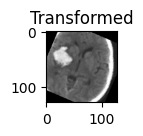

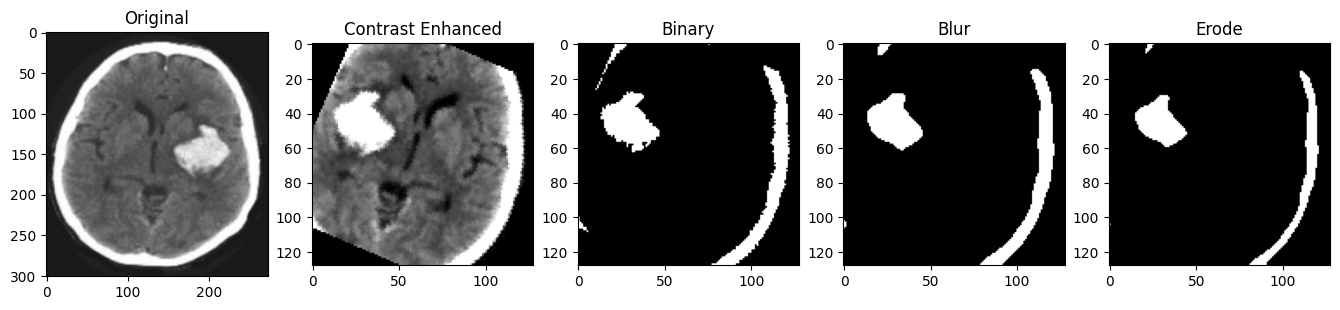

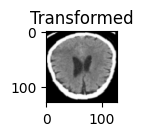

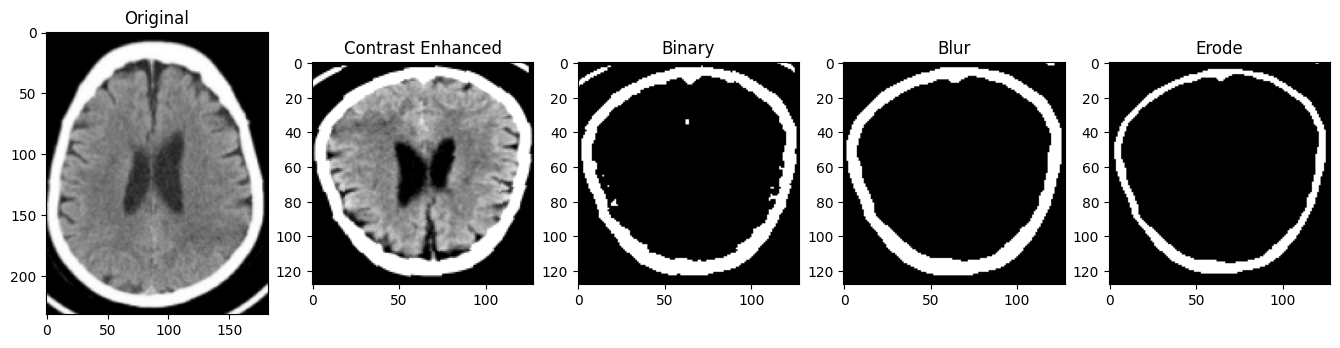

In [107]:
ar = [23, 152]
for i in ar:
    img = Image.open(image_files[i])
    le = 6
    plt.subplot(1, le, 6)
    imgt = T(img)
    plt.imshow(imgt, cmap='gray')
    plt.title("Transformed")
    enh_con = ImageEnhance.Contrast(imgt)
    contrast = 2
    img_contrasted = enh_con.enhance(contrast)
    plt.figure(figsize=(20, 20))
    plt.subplot(1, le, 2)
    plt.imshow(img_contrasted)
    plt.title("Contrast Enhanced")
    plt.subplot(1, le, 1)
    plt.imshow(img)
    plt.title("Original")
    img = cv2.cvtColor(np.asarray(imgt), cv2.COLOR_RGB2GRAY)
    difference = (img.max() - img.min()) // 1.6
    # 将图像二值化
    _, img_binary = cv2.threshold(img, difference, 1, cv2.THRESH_BINARY)
    plt.subplot(1, le, 3)
    plt.imshow(img_binary, cmap='gray')
    plt.title("Binary")
    img_blur = cv2.medianBlur(img_binary, 7)
    plt.subplot(1, le, 4)
    plt.imshow(img_blur, cmap='gray')
    plt.title("Blur")
    img_blur = cv2.medianBlur(img_binary, 7)
    plt.subplot(1, le, 5)
    imger = cv2.erode(img_blur, np.ones((3, 3), np.uint8), iterations=1)
    plt.imshow(imger, cmap='gray')
    plt.title("Erode")
    plt.show()


Text(0.5, 1.0, 'GrayImg after Equalization')

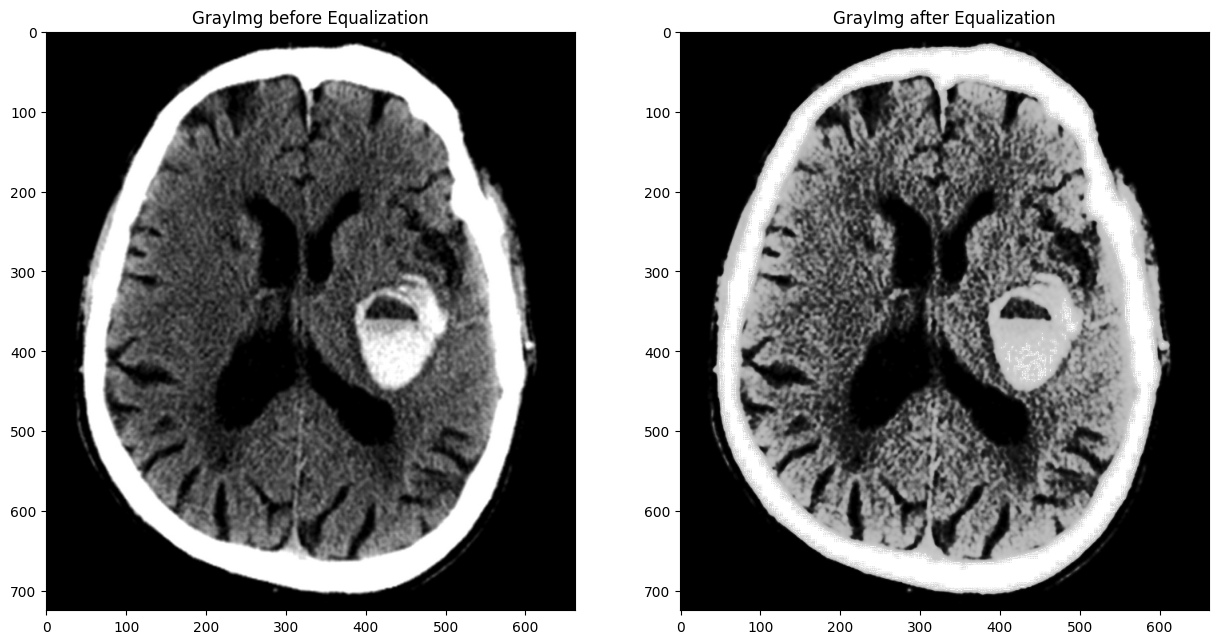

In [81]:
gray = cv2.imread(image_files[2], cv2.IMREAD_GRAYSCALE)
# print(np.shape(img))
# dstimg=adaptContrastEnhancement(img,15,10)
# plt.imshow(dstimg)
# plt.show()
# plt.imshow(img)
plt.figure(12, figsize=(15, 30))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('GrayImg before Equalization')

equalize = cv2.equalizeHist(gray)
plt.subplot(122)
plt.imshow(equalize, cmap='gray')
plt.title('GrayImg after Equalization')

In [95]:
from torchvision import transforms, datasets, utils

In [151]:
T = transforms.Compose([transforms.RandomResizedCrop((128, 128),
                                                     scale=(0.6, 1),
                                                     ratio=(0.5, 2)),
                        transforms.RandomRotation(30),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomVerticalFlip()])

arn = [23, 152]
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(cv2.imread(image_files[i]), cmap='gray')


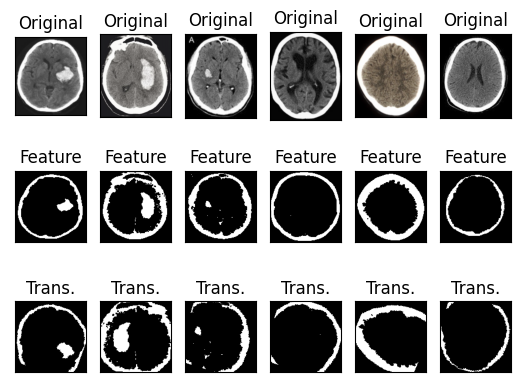

In [159]:
arn = [23, 28, 46, 136, 173, 192]
for i in range(6):
    plt.subplot(3, 6, i + 1)
    plt.imshow(cv2.imread(image_files[arn[i]]), cmap='gray')
    plt.title("Original")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 6, i + 7)
    plt.imshow(feature_engineering(cv2.imread(image_files[arn[i]])), cmap='gray')
    plt.title("Feature")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 6, i + 13)
    plt.imshow(T(Image.fromarray(feature_engineering(cv2.imread(image_files[arn[i]])))), cmap='gray')
    plt.title("Trans.")
    plt.xticks([])
    plt.yticks([])
# plt.subplots_adjust(wspace=0.5, hspace=0.1)

Text(0.5, 1.0, 'GrayImg after Equalization')

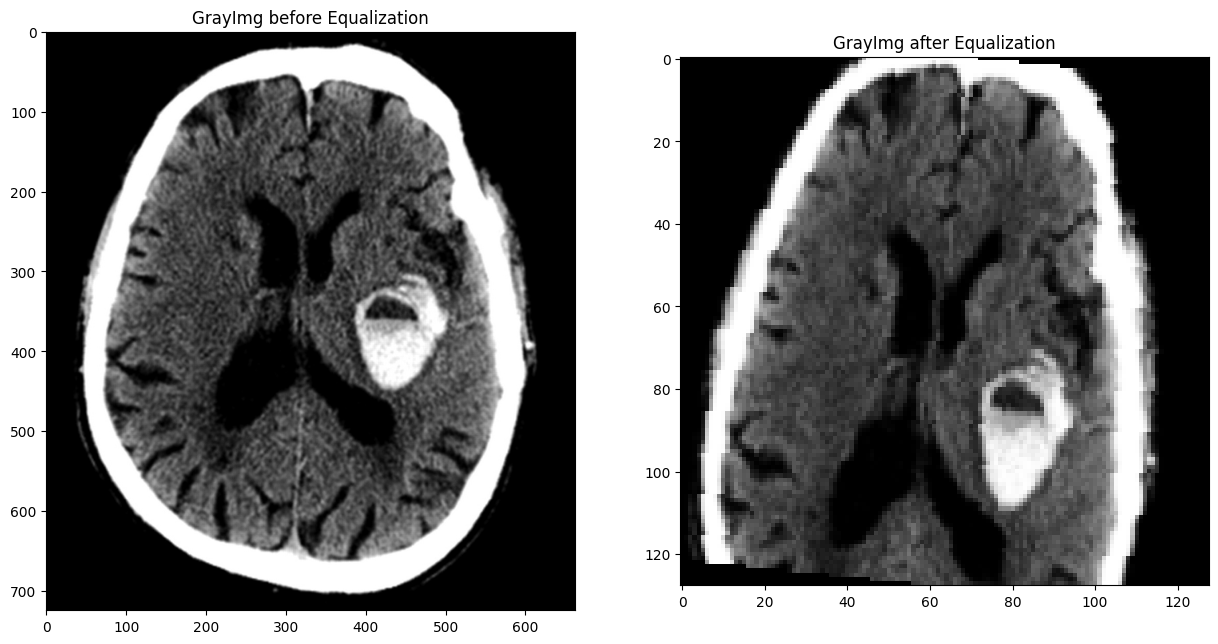

In [103]:
gray = cv2.imread(image_files[2], cv2.IMREAD_GRAYSCALE)
plt.figure(12, figsize=(15, 30))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('GrayImg before Equalization')

equalize = T(Image.fromarray(gray))
plt.subplot(122)
plt.imshow(equalize, cmap='gray')
plt.title('GrayImg after Equalization')

In [137]:
def feature_engineering(img):
    img = Image.fromarray(img)  # openCV to PIL

    img = ImageEnhance.Contrast(img)  # 1 contrast enhancement
    contrast = 2
    img = img.enhance(contrast)
    img = np.asarray(img)  # PIL to openCV
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 2 gray scale
    thresh = (img.max() - img.min()) // 1.6  # binarize threshold
    _, img = cv2.threshold(img, thresh, 1, cv2.THRESH_BINARY)  # 3 binarize
    img = cv2.medianBlur(img, 7)  # 4 median blur
    img = cv2.erode(img, np.ones((3, 3), np.uint8), iterations=2)  # 5 erode
    img = cv2.resize(img, (128, 128))  # 6 resize

    return img

Text(0.5, 1.0, 'After')

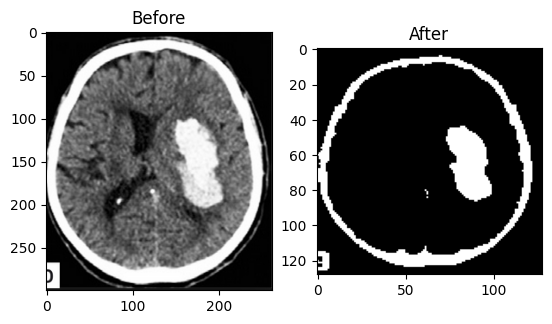

In [138]:
id = 78
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_files[id]), cmap='gray')
plt.title('Before')
plt.subplot(1, 2, 2)
plt.imshow(feature_engineering(cv2.imread(image_files[id])), cmap='gray')
plt.title('After')


In [162]:
labels_df = pd.read_csv('input/labels.csv')

In [163]:
label_path = './input/labels.csv'
image_path = './input/head_ct/head_ct'

label_df = pd.read_csv(label_path)
image_files = sorted(glob.glob(image_path + '/*.png'))

In [238]:
idx = np.random.permutation(200)

In [239]:
X = []
y = []

for i in range(0,150):
    i=idx[i]
    imgn = cv2.imread(image_files[i])
    # X.append(feature_engineering(imgn))
    # y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])
    X.append(T(Image.fromarray(feature_engineering(imgn))))
    y.append(label_df[' hemorrhage'].iloc[i])

np.shape(X), np.shape(y), np.shape(X[0])

/home/ubuntu/miniconda3/envs/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1970: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/home/ubuntu/miniconda3/envs/env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


((1200,), (1200,), (128, 128))

In [240]:
Xt = []
yt = []

for i in range(150,200):
    i = idx[i]
    imgn = cv2.imread(image_files[i])
    Xt.append(feature_engineering(imgn))
    yt.append(label_df[' hemorrhage'].iloc[i])

In [171]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [241]:
X = [np.reshape(i, (-1,)) for i in X]
Xt = [np.reshape(i, (-1,)) for i in Xt]

In [193]:
np.shape(X[0])

(16384,)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [261]:
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((840, 16384), (360, 16384), (840,), (360,))

In [268]:
kfold = KFold(n_splits=10, shuffle=True)
for train, test in kfold.split(X_train, y_train):
    print('train: %s, test: %s' % (train, test))
    model.score(X_train[train], y_train[train])
# result = cross_val_score(model,X_test, y_test, cv=kfold)
# print(result)
# result = cross_val_score(model,Xt, yt, cv=kfold)
# print(result)

train: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  48  49  50  51  52  54  55  56  57
  59  60  61  62  63  64  65  66  67  69  70  71  72  73  74  76  77  78
  79  80  82  83  84  85  86  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 105 106 107 108 109 111 112 113 114 115 116 118 119
 121 122 123 124 125 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 145 146 147 148 149 150 152 153 154 155 156 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266

TypeError: only integer scalar arrays can be converted to a scalar index

In [247]:
model = LogisticRegression(n_jobs=-1, max_iter=18000)

In [254]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=18000, n_jobs=-1)

In [249]:
model.score(Xt, yt)

0.88

In [250]:
model.score(X_test, y_test)

0.8333333333333334

In [203]:
result = cross_val_score(model,X_test, y_test, cv=kfold)
print(result)

[0.72222222 0.55555556 0.77777778 0.72222222 0.72222222 0.83333333
 0.55555556 0.5        0.66666667 0.77777778]


In [202]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=4000, n_jobs=-1)

In [182]:
np.shape(X_train)

(280, 16384, 1)